<span style="color:red">
Disclaimer: Do not share this Python notebook to third parties <br>
Atencao: Nao compartilhe esse Python notebook com outras pessoas </span>
<h1><b>Networks in socio-economic systems </b></h1>
<h3>Prof Luis E C Rocha - luis.rocha@ugent.be</h3>
<h4>Dept of Economics and Dept of Physics and Astronomy</h4>
<h4>Ghent University, Belgium</h4>
<h4><b>Version:</b> Federal University of Uberlandia, Brazil - November 2023 </h4>

<h1><b>Lab 4: Connectivity and centrality</b></h1>

<h3>Summary:</h3> The goal of this lab is to introduce some methods for the detection of cycles and connected components, and for the calculation of centrality measures (and review some pointers for motif detection software). In the second part, there is an exercise to analyse collaborative networks of patents and an extra exercise about flight networks.

<h2><b>(0:00-1:15h) Part 1 </b></h2>

<h2><b>1.</b> Cycles, connected components, and motifs </h2>

<h4>1.1. Cycles</h4>


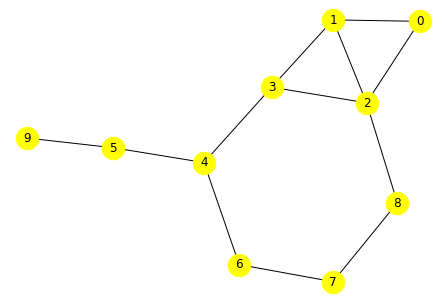

In [174]:
import networkx as nx

# Generate an undirected network and visualise it

Q = nx.Graph()
Q.add_edges_from([(0, 1), (3, 1), (1, 2), (2, 0), (2, 3), (3, 4), (4, 5), (5, 9), (4, 6), (6, 7), (7, 8), (8, 2)])
nx.draw(Q, with_labels = True, pos = nx.kamada_kawai_layout(Q), node_size = 500, node_color = 'yellow')


In [175]:
# Find all basic cycles of the network

list_of_cycles = nx.cycle_basis(Q)
print(list_of_cycles)


[[1, 2, 0], [3, 4, 6, 7, 8, 2], [1, 3, 2]]


In [176]:
# Retrieve an item (i.e. a specific cycle) from the list of detected cycles

# Attention: the method nx.cycle_basis does not return an ordered list of cycles, so a trick is to first
# sort the cycles - in terms of cycle length - and then print the desired cycles, e.g. the largest or shortest
list_of_cycles = sorted( nx.cycle_basis(Q) )

for i in range( len(list_of_cycles) ):
    print("The length of the cycle %d is %.1f" % (i, len(list_of_cycles[i])) )
    print("-- and the cycle is: %s" % list_of_cycles[i] )
    

The length of the cycle 0 is 3.0
-- and the cycle is: [1, 2, 0]
The length of the cycle 1 is 3.0
-- and the cycle is: [1, 3, 2]
The length of the cycle 2 is 6.0
-- and the cycle is: [3, 4, 6, 7, 8, 2]


The length of the cycle 0 is 3.0
-- and the cycle is: [0, 1, 2]
The length of the cycle 1 is 4.0
-- and the cycle is: [0, 1, 3, 2]
The length of the cycle 2 is 8.0
-- and the cycle is: [0, 1, 3, 4, 6, 7, 8, 2]


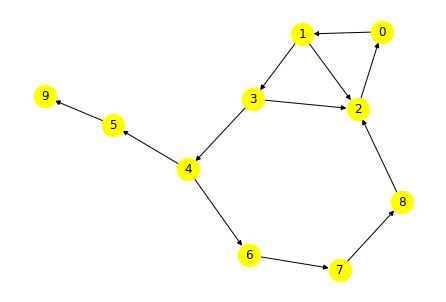

In [177]:
# Generate a directed network and visualise it

G = nx.DiGraph()
G.add_edges_from([(0, 1), (1, 3), (1, 2), (2, 0), (3, 2), (3, 4), (4, 5), (5, 9), (4, 6), (6, 7), (7, 8), (8, 2)])
nx.draw(G, with_labels = True, pos = nx.kamada_kawai_layout(G), node_size = 500, node_color = 'yellow')

# Find all basic cycles of the network
list_of_cycles = sorted( nx.simple_cycles(G) )

for i in range( len(list_of_cycles) ):
    print("The length of the cycle %d is %.1f" % (i, len(list_of_cycles[i])) )
    print("-- and the cycle is: %s" % list_of_cycles[i] )

# Exercise: Try to change the direction of some of the links above to see how the cycles change, e.g:
# G.add_edges_from([(0, 1), (1,3), (1, 2), (2, 0), (2, 3), (3, 4), (4, 5), (5, 9), (4, 6), (6, 7), (7, 8), (8, 2)])


<h4>1.2. Connected Components</h4>


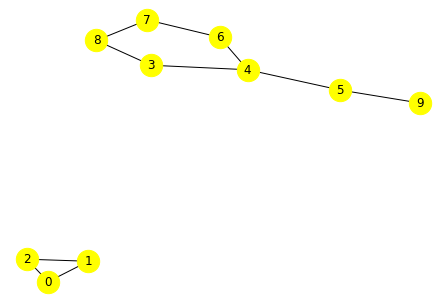

In [178]:
# There are a few useful methods to check the connectivity of the network

import networkx as nx

# Generate and visualise an undirected network
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0), (3, 4), (3, 8), (4, 5), (5, 9), (4, 6), (6, 7), (7, 8)])
nx.draw(G, with_labels = True, pos = nx.spring_layout(G), node_size = 500, node_color = "yellow") # forces between nodes (using springs and minimising the energy) but also try to keep topologically close nodes, spatially close to each other
#nx.draw(G, with_labels = True, pos = nx.kamada_kawai_layout(G), node_size = 300)             # forces between nodes (using springs and minimising the energy)


In [180]:
# Check if the network is connected
print('Is the network connected?', nx.is_connected(G) )

# For directed networks, one has to check *strongly connected* (there is a path between all pairs of nodes in the directed network) 
#or *weakly connected* components (there is a path IF you first convert the directed network to an undirected network)
#nx.is_strongly_connected(G)

# Check the number of connected components
print('No. connected components:', nx.number_connected_components(G) )

# Retrieve the ID of the nodes in each connected component
print('Id of the nodes in each connected component:', list(nx.connected_components(G)) )

# Return all the nodes in the connected component containing node "n"
print('All nodes in the connected component containing node = 1:', nx.node_connected_component(G, n = 1) )

# Extract the largest connected component (giant component)
# This is important because some network measures/algorithms do not work when the network is not connected

# Sort the (list of) connected components by "len" (i.e. the "size" of the connected component) and order them from largest to smallest component
Gcc = sorted( nx.connected_components(G), key=len, reverse = True )
# print the largest component, i.e. Gcc[0]
print('Giant component:', Gcc[0])

# Make a subgraph "H" of "G" containing only the giant component, i.e. Gcc[0]
H = G.subgraph( Gcc[0] ).copy()

# Check if the network is connected
print('Is the giant component connected?', nx.is_connected(H) )

#=======================================================
# Some tips
# return a list of all the connected components
#list_of_concomp = list( nx.connected_components(G) )
# return the first item of the list, i.e. the first connected component, in a new list
#conn_comp_1 = list( list_of_concomp[0] )
# return the size of the first connected component
#size_conn_comp_1 = len(conn_comp_1)
# return the second node of the first connected component
#conn_comp_1[1]
#=======================================================


Is the network connected? False
No. connected components: 2
Id of the nodes in each connected component: [{0, 1, 2}, {3, 4, 5, 6, 7, 8, 9}]
All nodes in the connected component containing node = 1: {0, 1, 2}
Giant component: {3, 4, 5, 6, 7, 8, 9}
Is the giant component connected? True


<h3><b>Exercise 1:</b> Connected components</h3>

The goal of this exercise is to practice the methods above about network connectivity and connected components, and reflect on their meaning for different networks.

<ul>
    <li> Go to: https://users.ugent.be/~lcorread/courses/UFU/ </li>
    <li> Although these networks are the same from what we used before - week2_*.csv -, download these new files - week5_*.csv - for this exercise. The networks in previous exercises were pre-processed and have slightly different structures </li>
    <li> Download the network data sets below </li>
    <ul>
        <li>1) Actor</li>
        <li>2) Collaboration</li>
        <li>3) Internet</li>
        <li>4) Power Grid</li>
        <li>5) Phone Calls</li>
        <li>6) Citation</li>
        <li>7) Email</li>
        <li>8) WWW</li>
        <li> Ps: Nodes are labelled from 0 continuously. Each line contains two node labels A and B, representing either a directed link A->B or an undirected link A-B. Undirected links appear only once in the file.</li>
    </ul>
    <li> See more details about these networks in lab 2 </li>
</ul>

<h4> Proposed analysis</h4>

<ul>
    <li> Study the characteristics of the connected components in these networks </li>
    <li> Do all the networks have a single connected component? </li>
    <li> If not
    <ul>
        <li> How many connected components? </li>
        <li> What is the size of the largest/giant component? </li>
        <li> What are potential implications for spreading processes if the network is fragmented? and if it has a giant component? </li>
    </ul>
    <li> Advanced exercises </li>
    <ul>
        <li> What is the distribution of sizes of connected components? </li>
        <ul>
            <li> tip: use the module "powerlaw" from lab 3 to plot and fit a function to this distribution</li>
            <li> What do the results mean? (tip) think about network fragmentation </li>
            <li> What are the implications of such distribution of component sizes for each network? </li>
            <li> Compare also the degree distribution of the entire network with the degree distribution of the giant component </li>
        </ul>
        <li> What is the distribution of cycle sizes for each network? </li>
        <ul>
            <li> tip: use the module "powerlaw" from lab 3 </li>
            <li> tip: the calculations may take some time for some networks. Try first with the email network, that may be "faster" </li>
            <li> What do the results mean? tip: think about paths and clustering </li>
        </ul>
    </ul>
</ul>


In [157]:
# Solutions

# There are no specific solutions for this exercise.
# To read the files, see previous labs, especially lab 2 and lab 3.
# To make the necessary calculations, you just need to use the methods above, i.e. copy and paste


<h4>1.3. Motifs</h4>

There are no build-in functions in networkx for motif detection but there are a few stand-alone (free) software to detect motifs:
<ul>
    <li> FANMOD: http://theinf1.informatik.uni-jena.de/motifs/ (quite popular option and the one I normally use) </li>
    <ul>
        <li> if the link is not working, try https://www.softpedia.com/get/Network-Tools/Misc-Networking-Tools/FANMOD.shtml </li>
        <li> or download (temporarily) from UFora </li>
        <li> It might not work in the newest versions of Windows and MacOS. Then, try another software. </li>
    </ul>
    <li> Alternatives: </li>
    <ul>
        <li> This visual interface is also very good https://netbio.bgu.ac.il/motifnet2/#/ </li>
        <li> Alternative: https://www.weizmann.ac.il/mcb/UriAlon/download/network-motif-software </li>
        <li> Alternative: http://mavisto.ipk-gatersleben.de/ </li>
        <li> There is a Python module for motif detection but I did not try it yet: https://github.com/gtremper/Network-Motif </li>
    </ul>
</ul>


<h2><b>2.</b> Centrality measures</h2>

There are various methods to calculate the centrality (i.e. the importance) of the nodes in a network. The degree and the k-core can be seen as measures of node centrality. Here we see Python methods to calculate some advanced types of centrality.


In [158]:
# Methods to calculate some of the most important centrality measures

import networkx as nx
import pandas as pd

G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0), (2, 3), (3, 4), (4, 5), (5, 9), (4, 6), (6, 7), (7, 8), (8, 2)])

# Degree centrality -> the same as the node-degree normalised by N-1
k_cent = nx.degree_centrality(G)           

# in-Degree centrality -> the same as the node in-degree normalised by N-1
#k_in_cent = nx.in_degree_centrality(G)

# betweenness centrality -> for undirected (normalised by 2/((n-1)(n-2))) and directed networks (normalised by 1/((n-1)(n-2)))
# Attention: the standard way to calculate betweenness is without weights. If you want to add the weights, add weight="weights"
# Attention: if the network is too large, you can try to set "k". "k" gives the number of samples taken to estimate the shortest paths - instead of taking ALL shortest paths
# Attention: You can further normalise the betweenness using the method mentioned in the class (see slides lecture 5)
b_cent = nx.betweenness_centrality(G)

# PageRank centrality - for directed networks
# Attention: the standard way to calculate PageRank is without weights. If you want to add the weights, add weight="weights"
pr_cent = nx.pagerank(G)

# Eigenvector centrality - similar to PageRank (see slides lecture 5) but for undirected networks
# the method nx.pagerank() above works with undirected network by assuming that all edges are bidirectional
ev_cent = nx.eigenvector_centrality(G)

# ======= Extra exercise =====
# You can compare the calculation of pagerank (PR) with and without weights on the links
# Generate a simple weighted network
#G.add_edges_from([(0, 1, {'weight': 9.1}), (1, 2), (2, 0), (2, 3), (3, 4), (4, 5), (5, 9), (4, 6), (6, 7), (7, 8), (8, 2)])
# PageRank without edge weight, i.e. (weight='weight')
#pr_cent_weight = nx.pagerank(G, weight='weight')
# PageRank without edge weight, i.e. (weight=None)
#pr_cent_noweight = nx.pagerank(G, weight='weight')
# ============================


In [160]:
# Store the centrality of each node, that is originally in a dictionary, to a dataframe (as done before for k-core, clustering coefficient)
df1 = pd.DataFrame.from_dict(k_cent, orient='index', columns=['Degree'])
df2 = pd.DataFrame.from_dict(b_cent, orient='index', columns=['Betweenness'])
df3 = pd.DataFrame.from_dict(pr_cent, orient='index', columns=['PageRank'])
df4 = pd.DataFrame.from_dict(ev_cent, orient='index', columns=['EigenVector'])

# Combine all dataframes into a single dataframe
# concatenate the dataframes in 4 columns (axis=1 means columns)
centralities = pd.concat([df1, df2, df3, df4], axis = 1)

# order rows according to index
# This is done just because the generated dictionaries (above) are unordered
centralities.sort_index(inplace = True)

# print the dataframe with the centrality measures
print( centralities )


     Degree  Betweenness  PageRank  EigenVector
0  0.222222     0.000000  0.086804     0.386961
1  0.222222     0.000000  0.086804     0.386961
2  0.444444     0.472222  0.164294     0.573168
3  0.222222     0.333333  0.088507     0.336301
4  0.333333     0.472222  0.136219     0.261259
5  0.222222     0.222222  0.103867     0.125719
6  0.222222     0.138889  0.092845     0.186211
7  0.222222     0.111111  0.092354     0.200763
8  0.222222     0.138889  0.089162     0.311918
9  0.111111     0.000000  0.059144     0.050669


<h3><b>Exercise 2:</b> Centrality measures</h3>

The goal of this exercise is to practice the implementation of centrality measures, study if they bring different information (correlation analysis), and reflect on the meaning and implications of centrality on different networks.

<h4> Proposed analysis</h4>

Use the same networks as from the previous exercise. Choose one network (e.g. email data) and calculate the node centrality using all methods above
<ul>
    <li> Make a dataframe with degree and the centrality measures </li>
    <li> Make a correlation analysis between these measures </li>
    <ul>        
        <li> make scatter plots of degree vs. centrality, for all 3 centralities </li>
        <li> calculate the Pearson correlation </li>
        <li> tip: see lab 2 for the routine to make scatter plots and correlation analysis </li>
        <li> Interpret the results
        <ul>
            <li> What does a positive (or negative) correlation between the 2 measures mean here? </li>
            <li> E.g. does a node with high betweenness also has high degree? </li>
            <li> does this relation depend on the network? </li>
            <li> How do you think the position of certain nodes would affect the spread of information, a market campaign, or the influence potential?</li>
            <li> Attention: This is an abstract exercise where you have to make connections between measures to understand the structure of the network. Reflect on "how much correlation is too much correlation"? </li>
        </ul>
    </ul>
</ul>
<b> Advanced analysis (homework) </b>
<ul>
    <li> What is the distribution of page-rank for the chosen network? </li>
    <ul>
        <li> tip: Use the module "powerlaw" from lab 3 </li>
        <li> What do the results mean in the context of the chosen network? is the distribution normal/exponential or skewed? </li>
    </ul>
    <li> Repeat the same analysis for betweenness centrality </li>
    <ul>
        <li> tip: use only the email network because the calculations of betweenness centrality may take some time for other measures </li>
        <li> What do the results mean in the context of the chosen network? </li>
    </ul>
    <li> You can compare the centrality measures for different connected components </li>
    <li> Can you come up with another way of analysing or visualising the centrality measures? </li>
</ul> 



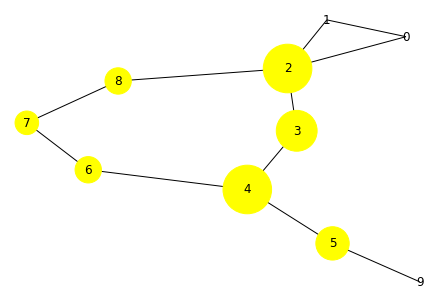

In [161]:
# Some ideas to analyse centrality using visual analysis

# Draw a network. The size of the nodes are proportional to the betweeness centrality
nx.draw(G, with_labels = True, pos = nx.spring_layout(G), node_size = [x * 5000 for x in list(b_cent.values()) ], node_color = "yellow")

# Similar ways of getting the same results
#nx.draw(G, with_labels = True, pos = nx.spring_layout(G), node_size = [x * 5000 for x in list( centralities['Betweenness'] ) ] )
#nx.draw(G, with_labels = True, pos = nx.spring_layout(G), node_size = [x * 5000 for x in list( centralities.loc[:,'Betweenness'] ) ] )

<h1>15 min break! </h1>

<h2><b>(1:30-2:45h) Part 2 </b></h2>

<h3><b>4.</b> (1:30-2:45h) Get your hands dirty</h3>

<h4> Patent networks</h4>

Patent networks are one type of co-authorship networks, i.e. if two people (e.g. researchers, developers) $i$ and $j$ (or two organisations -e.g. universities, firms- $h$ and $k$) sign a patent, there is a connection between the respective nodes $(i,j)$ (or $(h,k)$) in the network. Patent networks may indicate the potential of innovation in the system, because the position of the node may positively affect the flow of ideas or information such that the node is more productive (more patents) or innovative (higher impact patents). The quality of the innovation is hard to measure but the productive is not; it is the number of patents produced by a certain person or a certain company.

<ul>
   <li> What sorts of communications might be involved/reflected in such networks? </li>
   <li> In terms of social capital, what sorts of power do nodes with high degree, high betweenness, or high clustering have in these communications? </li>
   <li> What implications do these network positions have for the innovation capacity of these organisations? </li>
   <li> tip: Innovation is a result of collaboration and intellectual exchange between two organisations or individuals </li>
</ul>

<h4> Network model</h4>

We have data on co-authorship of patents (filled in the USA) at the organisation level, i.e. companies and research institutes. In the data set, there is also <b>some</b> metadata, i.e. information on attributes of the organisations.
<ul>
    <li> Download the data from https://users.ugent.be/~lcorread/courses/week5/week5_patent_drugs.xlsx </li>
    <li> Open the data set (using Excel) and identify how you can build a meaningful network. Check also what are the available information on the data set </li>
    <li> Create a network and use the available metadata to associate attributes to nodes. For this exercise, use the number of patents, number of employees, and research expenditure </li>
    <ul>
        <li> (homework) you can use the other attributes to enrich your network analysis. How could you combine them with the structural measures we have seen so far? </li>
    </ul>
</ul>


In [228]:
# Solutions

# Code to build the network

import networkx as nx
import pandas as pd
import numpy as np    #-> this module has useful methods for numerical calculations

# Create a graph object
G = nx.Graph()

# Read the edge list from the file
#df1 = pd.read_excel(open('./data/week5_patent_drugs.xlsx', 'rb'), sheet_name = 'Edgelist',  header = None, keep_default_na=True)
df1 = pd.read_excel('./data/week5_patent_drugs.xlsx', sheet_name='Edgelist', header = None, keep_default_na=True)

# Attention: If needed, replace "NaN" by -1 (see more on lab 4, about cleaning a data set)
# I do not like to work with "NaN", therefore, here I replace "nan" by -1
df1.replace(np.nan, -1, inplace = True)

df1

,0,1
0,"Dainhon Jochugiku Co., Ltd.",Educational Foundation Nihon University
1,Universite de Bordeaux 1,Centre Hospitalier Universitaire De Besancon
2,Shanghai Biomodel Organism Science & Technolog...,Shanghai Research Center for Model Organisms
3,"Reata Pharmaceuticals, Inc.",Trustees of Dartmouth College
4,GENTEX CORPORATION,Icahn School of Medicine at Mount Sinai
...,...,...
565,"Los Alamos National Security, LLC",University of Alabama at Birmingham Research F...
566,Blood Center Research Foundation,"The Medical College of Wisconsin, Inc."
567,PIERRE FABRE MEDICAMENT,COMMISSARIAT A L'ENERGIE ATOMIQUE ET AUX ENERG...
568,E.I. duPont de Nemours and Company,Pioneer Bred International Inc


In [229]:
# Add edges and nodes to the network G
# There are many ways to create a network
# Here, I add each edge in the dataframe and add the respective nodes with attributes "= -1"
# Using this method, I am sure that all nodes will have attributes
for i in range(len(df1)):
    G.add_edge(df1.loc[i,0], df1.loc[i,1])        # Add edge (A,B) to the network
    G.add_node(df1.loc[i,0], label = df1.loc[i,0], patents = -1, employees = -1, expenditure = -1) # Add node A with -1 as attribute
    G.add_node(df1.loc[i,1], label = df1.loc[i,1], patents = -1, employees = -1, expenditure = -1) # Add node B with -1 as attribute

# Read the nodes with attributes from the same file but from another *sheet*
#df2 = pd.read_excel(open('./data/week5_patent_drugs.xlsx', 'rb'), sheet_name = 'Attributes', keep_default_na=True)
df2 = pd.read_excel('./data/week5_patent_drugs.xlsx', sheet_name='Attributes', keep_default_na=True)

# replace "NaN" by -1
df2.replace(np.nan, -1, inplace = True)

# Add the nodes with the respective attributes to the network
# Attention: in the routine above, I added all nodes with attributes "-1", now I add the nodes with
# the right values for each attribute that I read from a "sheet", i.e. those nodes will be replaced in the same graph object
for i in range(len(df2)):
    G.add_node(df2.loc[i,'ID'], label = df2.loc[i,'ID'], patents = df2.loc[i,'Patent_count'], employees = df2.loc[i,'Employees_2012'], expenditure = df2.loc[i,'R&D_2012'])

df2

,ID,Patent_industry,University,Patent_count,Turnover_lay,Turnover_2012,Total_assets_2012,Employees_2012,R&D_2012,Country_code
0,"The United States of America, represented by t...",3,0,2,79662.0,-1.0,-1.0,-1.0,-1.0,2.0
1,The Regents of the University of California,3,1,5684,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,The Regents of The University of Michigan,3,1,378,350000.0,-1.0,-1.0,-1.0,-1.0,1.0
3,Trustees of Boston University,3,1,60,3000000.0,-1.0,-1.0,-1.0,-1.0,1.0
4,California Institute of Technology,3,1,702,350000.0,-1.0,-1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,Cook Medical Technologies LLC,3,0,300,750000.0,-1.0,-1.0,-1.0,-1.0,1.0
175,Inserm (Institut National de la Sante et de la...,3,0,9,-1.0,-1.0,-1.0,-1.0,-1.0,6.0
176,Cogiscan Inc.,3,0,8,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
177,"Hyclone Labortories, Inc.",3,0,1,175000.0,-1.0,-1.0,-1.0,-1.0,1.0


<h4><b>Recipe:</b> How to start any network analysis?</h4>

The first questions to be done when doing network analysis.
<ul>
    <li> 1. Should I analyse the unweighted, weighted, directed or undirected network?
    <ul>
        <li> tip: it depends on what you want to study. It is totally OK for example to perform some measures in the weighted network and some measures in the unweighted version of the same network. It is important however to acknowledge what is the network from where you got "this" or "that" measure.
    </ul>
    <li> 2. What is the size, i.e. number of nodes and number of edges, of the network? </li>
    <ul>
        <li> tip: if the network is small and not too dense, first draw it and make a brief visual assessment and analysis. Can you find some network structures that are relevant or interesting to investigate further? </li>
        <li> initial visual analysis if the network is not too large: Which method is best to draw the network? using its spatial coordinates, using the algorithm to place the nodes with minimum overlap? </li>
        <ul>
            <li> Is this network well-connected? </li>
            <li> Are there nodes with particular structural characteristics? or are they more or less the same? </li>
            <li> Can you visually find clusters or cycles? Are there many? </li>
            <li> Are there bridging nodes? </li>
        </ul>
    </ul>
    <li> 3. Is the network connected?
    <ul>
        <li> If not, how many connected components? what is the giant component?
        <ul>
            <li> What is the distribution of the sizes of the connected components?
            <li> What does being connected or unconnected mean?
        </ul>
    </ul>
    <ul>
        <li> If not, analyse the entire network when appropriate (e.g. degree distribution, clustering, etc..) but also keep in mind that some measures are only meaningful in the giant component (e.g. some centrality measures, avg. distances) </li>
    </ul>
</ul>


In [230]:
# Solutions

# show the number of nodes
print("Number of nodes: %d" %G.number_of_nodes() )
# show the list of nodes with node attributes
#print( G.nodes(data = True) )

# show the number of edges
print("Number of edges: %d" %G.number_of_edges() )
# show the list of edges with node attributes
#print( G.edges() )


Number of nodes: 658
Number of edges: 570


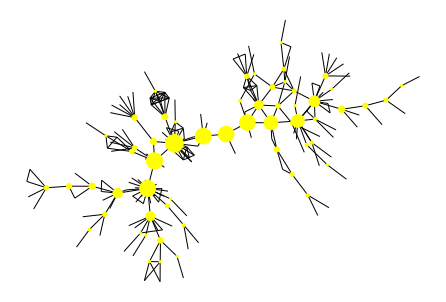

In [250]:
# Solutions

# Is there a giant component? if so, make a new network containing only the giant component of the original network

# Find the giant component
# This method find all connected components, order then (using "sort") in descending order (reverse=True) by size (key=len)
Gcc = sorted( nx.connected_components(G), key=len, reverse=True)

# Make a subgraph "H" of "G" containing only the giant component, i.e. Gcc[0]
H = G.subgraph( Gcc[0] ).copy()

# Calculate the betweenness of the nodes in the giant component H
b_cent_pat = nx.betweenness_centrality(H)

# find the position of the nodes
# Note: You can use other algorithms to find the positions of the nodes, e.g. nx.spring_layout()
pos_nodes = nx.kamada_kawai_layout(H)

# Draw the network with the node size proportional to the betweenness centrality
# Note: I multiplied by 500 just to get a good circle size for visualisation
nx.draw(H, with_labels = False, pos = pos_nodes, node_size = [x * 500 for x in list(b_cent_pat.values()) ], node_color = "yellow")

# Exercise: Try with other node centrality measures


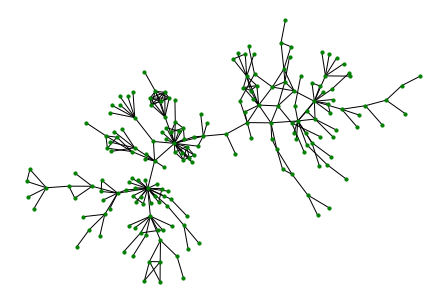

In [247]:
# Draw the network with the node size fixed
# Note: the nodes here are at the same position as the nodes in the previous network drawing
nx.draw(H, with_labels = False, pos = pos_nodes, node_size = 10, node_color = "green")


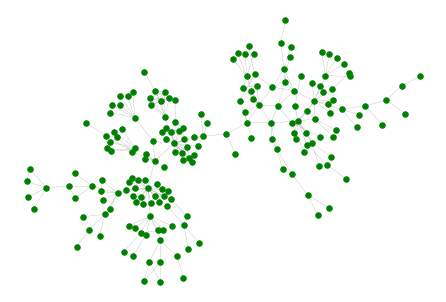

In [235]:
# Solutions

# Simple visualisation of the giant component "H" of network "G"

nx.draw(H, with_labels = False, pos = nx.kamada_kawai_layout(H), node_size = 30, width=0.1, node_color="green")
#nx.draw(H, with_labels = False, pos = nx.spring_layout(H, iterations=300), node_size = 30, width=0.1, node_color="black")
#nx.draw(H, with_labels = False, pos = nx.random_layout(H), node_size = 20, width=0.1)

# If you like network visualisation, explore examples of more elaborated layouts using networkX
# see info here: https://networkx.org/documentation/latest/auto_examples/index.html
# Alternatively, use the software Gephi as seen in lab 4

# Exercise: Try to visualise the entire network "G" and then only the second largest component of "G"


<h4> Proposed quantitative analysis</h4>

<ul>
    <li> Select 1 industry or sector (e.g. vehicles - automobile industry) </li>
    <ul>
        <li> Test the hypothesis H1: "expenditure in research increases the patent output" </li>
        <ul>
            <li> tip: you might have to discard some data points because there is no info for all companies </li>
            <li> tip: A simple regression analysis between input and output is sufficient here </li>
        </ul>
        <li> Test the hypothesis H2: "network position increases the patent output" </li>
        <ul>
            <li> Think about what network measures to use to determine the network position of nodes </li>
        </ul>
        <li> Try to formulate original/other hypotheses to test </li>
        <ul>
            <li> tip: Look at the attributes of the nodes </li>
            <li> tip: you coul normalise the patent output by some variable to minimise the effect of organisation size (i.e. productivity per-capita). In this data base, we do not have enough data in this variable though... </li>
        </ul>
    </ul>
    <li> What attribute is the best indicator of patent outputs?
    <ul>
        <li> Is the node position more relevant than intrinsic node properties? </li>
    </ul>
    <li> What are some characteristics of the nodes with high centrality? e.g. do you know such companies? in which countries are their headquarters? Are they well-established (old) or young companies? </li>
    <li> Do central companies partner more with research organisations (e.g. universities, research centres) or with other similar companies? </li>
    <li> Are there differences across industrial sectors? </li>
    <ul>
        <li> Go to https://users.ugent.be/~lcorread/courses/week5/ and download the other data sets. One for each industrial sector </li>
        <li> week5_patents_drugs.xlsx </li>
        <li> week5_patents_computers.xlsx </li>
        <li> week5_patents_fabricatedmaterials.xlsx </li>
        <li> week5_patents_rawmaterials.xlsx </li>
        <li> week5_patents_electrical.xlsx </li>
        <li> week5_patents_vehicles.xlsx </li>
    </ul>
    <li> Can you infer which sector/industry is more innovative than the other based on differences in the respective network structures? </li>
    <li><b> Advanced analysis </b></li>
    <ul>
        <li> Are there other local network characteristics that might be relevant for innovation? </li>
        <ul>
            <li> tip: for better statistics, here you can combine all the sectors and use the data of all available organisations that also contain attributes </li>
            <li> this is OK if you want to study general characteristics of the entire network (i.e. all sectors). For specific sectors, you have to separate the networks </li>
        </ul>
        <li> Study the distribution of each centrality for each network, as done for degree </li>
        <li> Can you get any insights on innovation potential by looking at macroscopic or global properties of the networks, in contrast to looking at the structure of individual nodes? </li>
        <ul>
            <li> For example, are organisations clustered or far apart in highly innovative sectors? Do such sectors/networks have higher assortativity? Is there a core?</li>
            <li> You can make a table with sectors and relevant measures for a comparative analysis </li>
        </ul>
        <li> Study the differences between international vs national collaboration patterns </li>
    </ul>
</ul>


In [167]:
# Some solutions

# Print the attributes of the nodes, to check if they are correct

# print only the node ID and the attribute in the variable "patents"
#H.nodes(data = "patents")

# print the node ID and all attributes
#H.nodes(data = True)


In [221]:
# Some solutions

# Calculate the relevant network measures and organise the data into a dataframe

# Degree centrality -> that is the same as the degree but normalised by N-1
k_cent = nx.degree_centrality(H)

# Betweenness centrality -> normalised by 2/((n-1)(n-2))
b_cent = nx.betweenness_centrality(H)

# Page-Rank centrality
pr_cent = nx.pagerank(H)

# Eigenvector centrality
# but the network in undirected! therefore, better to use eigenvector centrality
# note that the method nx.pagerank() above works with undirected network by assuming that all edges are bidirectional
ev_cent = nx.eigenvector_centrality(H)

# clustering coefficient of each node
cc = nx.clustering(H)

# Save the network measures of each node, that is originally in a dictionary, to dataframes
df1 = pd.DataFrame.from_dict(k_cent, orient='index', columns = ['degree'])
df2 = pd.DataFrame.from_dict(b_cent, orient='index', columns = ['betweenness'])
df3 = pd.DataFrame.from_dict(ev_cent, orient='index', columns = ['eigenvector'])
df4 = pd.DataFrame.from_dict(cc, orient='index', columns = ['clustering'])

# Save the attributes of each node, that are originally stored as node attributes, in dataframes
# Note that here I include the node column to make sure the index will store the node ID
df5 = pd.DataFrame( list(H.nodes(data = 'patents') ), columns = ['node','patents'])
df5 = df5.set_index('node')
df6 = pd.DataFrame( list(H.nodes(data = 'employees') ), columns = ['node','employees'])
df6 = df6.set_index('node')
df7 = pd.DataFrame( list(H.nodes(data = 'expenditure') ), columns = ['node','expenditure'])
df7 = df7.set_index('node')

# Combine all dataframes into a single dataframe
network_measures = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis = 1)

pd.set_option('display.max_rows', 20)


In [222]:
network_measures

,degree,betweenness,eigenvector,clustering,patents,employees,expenditure
Kimron Veterinary Institute,0.005291,0.000000,1.029502e-02,0.0,-1,-1.0,-1.0
"Singulex, Inc.",0.005291,0.000000,4.281837e-03,0.0,2,-1.0,-1.0
Palumed S.A.,0.005291,0.000000,4.112470e-02,0.0,1,-1.0,-1.0
University of South Florida,0.005291,0.000000,1.019227e-03,0.0,140,-1.0,-1.0
"INDI MOLECULAR, INC.",0.005291,0.000000,4.662116e-07,0.0,2,-1.0,-1.0
...,...,...,...,...,...,...,...
Baxter International Inc.,0.021164,0.010498,2.252998e-04,0.5,282,51000.0,940000.0
California Institute of Technology,0.015873,0.052009,2.853467e-06,0.0,702,-1.0,-1.0
Whitehead Institute for Biomedical Research,0.026455,0.039673,2.908775e-04,0.2,36,-1.0,-1.0
"Alliance for Sustainable Energy, LLC",0.005291,0.000000,1.240761e-04,0.0,24,-1.0,-1.0


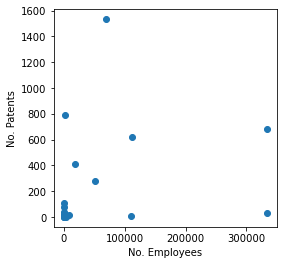

In [170]:
# Some solutions

# Plot the variables you want to analyse
import matplotlib.pyplot as plt

#%matplotlib inline

# To exclude the organisations with missing information, plot only points with values above zero
net_meas = net_meas[ (net_meas['employees'] > 0) & (net_meas['patents'] > 0)]
x = net_meas['employees']
y = net_meas['patents']

# plot number of employees vs. number of patents
plt.figure( figsize=(4, 4) )

plt.ylabel('No. Patents')
plt.xlabel('No. Employees')
#plt.xlim(-10000, 400000)
#plt.ylim(-100, 1800)
plt.scatter(x, y)

plt.show()


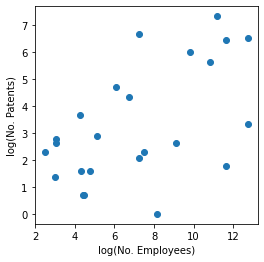

In [171]:
# Some solutions

# plot number of employees vs number of patents using log scale
# log-scale is appropriate when the range of values is too large
import numpy as np

plt.figure( figsize=(4, 4) )

plt.ylabel('log(No. Patents)')
plt.xlabel('log(No. Employees)')
plt.scatter(np.log(x), np.log(y))

plt.show()


Slope: 0.35 Intercept: 0.83
Pearson coeff.: 0.55 p-value: 0.005


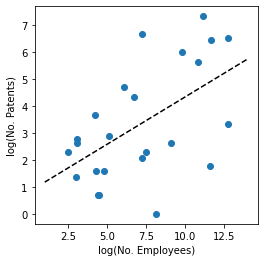

In [172]:
# Some solutions

# Make a linear fit to quantify the relation between the variables/measures

# Statistical module
import scipy.stats as st
import numpy as np        #-> this module has useful methods for numerical calculations

# Perform a simple linear regression using log-scale
slope, intercept, r_value, p_value, std_err = st.linregress( np.log(x), np.log(y) )

# print the slope and intercept of the best linear fit
print('Slope: %.2f' %slope, 'Intercept: %.2f' %intercept )

# Correlation Analysis
# print the correlation coefficient and the p-value
print('Pearson coeff.: %.2f p-value: %.3f' %(r_value, p_value) ) 
# Plot original data with a simple linear regression curve
plt.figure( figsize=(4, 4) )

plt.ylabel('log(No. Patents)')
plt.xlabel('log(No. Employees)')

# plot the original data using log-scale
plt.scatter( np.log(x), np.log(y) )

#plot a linear curve using the estimated exponents
xx = list( range(1,15) )                     # generate the x-values
y_fit = [i * slope + intercept for i in xx]  # calculate the y-values using the estimated exponents

plt.plot( xx, y_fit, 'k--')

plt.show()
